In [53]:
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns

df = pd.read_csv("/Users/maurits/Documents/Ironhack/week_03/GPW3/ironhack_gpw3/data/combined_dataset_allyears.csv")
df.head(10)

Matplotlib is building the font cache; this may take a moment.


,City Boundary Specification (LAU/grid),Country Or Territory,City,City Code,Total City Population *,Year,Air Pollutant,Health Risk Scenario,Populated Area [km2],Air Pollution Average [ug/m3],Air Pollution Population Weighted Average [ug/m3],Premature Deaths,Premature Deaths - lower CI,Premature Deaths - upper CI,Years Of Life Lost,Years Of Life Lost - lower CI,Years Of Life Lost - upper CI
0,Urban Centres (grid),Austria,All Urban Centres in a Country,NaN,2405646,2005,NO2,WHO_2005_HRAPIE_Scen_Base,446,30.3,32.8,1352.0,783.0,1911.0,14704.0,8522.0,20791.0
1,Urban Centres (grid),Belgium,All Urban Centres in a Country,NaN,3030639,2005,NO2,WHO_2005_HRAPIE_Scen_Base,745,32.4,35.1,2141.0,1247.0,3017.0,22939.0,13338.0,32327.0
2,Urban Centres (grid),Bulgaria,All Urban Centres in a Country,NaN,3010927,2005,NO2,WHO_2005_HRAPIE_Scen_Base,384,23.3,24.9,1236.0,712.0,1759.0,13367.0,7713.0,18982.0
3,Urban Centres (grid),Cyprus,All Urban Centres in a Country,NaN,418267,2005,NO2,WHO_2005_HRAPIE_Scen_Base,131,20.3,21.0,24.0,13.0,34.0,249.0,143.0,357.0
4,Urban Centres (grid),Czechia,All Urban Centres in a Country,NaN,2464143,2005,NO2,WHO_2005_HRAPIE_Scen_Base,536,26.4,27.6,961.0,554.0,1364.0,10585.0,6105.0,15045.0
5,Urban Centres (grid),Germany,All Urban Centres in a Country,NaN,25479567,2005,NO2,WHO_2005_HRAPIE_Scen_Base,6769,29.2,30.7,13555.0,7850.0,19178.0,152916.0,88550.0,216447.0
6,Urban Centres (grid),Denmark,All Urban Centres in a Country,NaN,1490619,2005,NO2,WHO_2005_HRAPIE_Scen_Base,400,22.5,24.1,341.0,197.0,487.0,3757.0,2159.0,5354.0
7,Urban Centres (grid),Estonia,All Urban Centres in a Country,NaN,522560,2005,NO2,WHO_2005_HRAPIE_Scen_Base,103,16.4,17.4,5.0,3.0,7.0,54.0,31.0,78.0
8,Urban Centres (grid),Spain,All Urban Centres in a Country,NaN,21279144,2005,NO2,WHO_2005_HRAPIE_Scen_Base,2439,29.8,34.3,13055.0,7618.0,18337.0,143218.0,83571.0,201141.0
9,Urban Centres (grid),European Union Countries,All Urban Centres in EU27,NaN,145177261,2005,NO2,WHO_2005_HRAPIE_Scen_Base,29537,29.3,32.1,81424.0,47430.0,114554.0,907395.0,528454.0,1276934.0


In [54]:
# CLEANING TECHNIQUES:

# 1. concatenate datasets DONE
# 2. rename columns: replace white spaces with underscores DONE
# 3. replace null values in column premature deaths with appropriate values
# 4. remove duplicated rows (if any)
# 5. remove redundant columns
# 6. handle null values
# 7. reset index

In [55]:
# 2. lowercase column names and replace white spaces for underscores.

df.columns = [col.replace(" ","_").lower() for col in df.columns]

In [56]:
# column_names = list([df.columns])
column_names = df.columns.tolist()
column_names

['city_boundary_specification_(lau/grid)',
 'country_or_territory',
 'city',
 'city_code',
 'total_city_population_*',
 'year',
 'air_pollutant',
 'health_risk_scenario',
 'populated_area_[km2]',
 'air_pollution_average_[ug/m3]',
 'air_pollution_population_weighted_average_[ug/m3]',
 'premature_deaths',
 'premature_deaths_-_lower_ci',
 'premature_deaths_-_upper_ci',
 'years_of_life_lost',
 'years_of_life_lost_-_lower_ci',
 'years_of_life_lost_-_upper_ci']

In [57]:
column_names[-6:]

['premature_deaths',
 'premature_deaths_-_lower_ci',
 'premature_deaths_-_upper_ci',
 'years_of_life_lost',
 'years_of_life_lost_-_lower_ci',
 'years_of_life_lost_-_upper_ci']

In [58]:
columns_to_check = column_names[-6:]

rows_with_null_values = df[columns_to_check].isnull().all(axis=1)

years_countries = df.loc[rows_with_null_values, ['country_or_territory', 'year']]


print(years_countries)


years_countries.describe()

       country_or_territory  year
56                  Austria  2005
57                  Belgium  2005
58                 Bulgaria  2005
59                   Cyprus  2005
60                  Czechia  2005
...                     ...   ...
226583             Slovakia  2019
226590             Slovakia  2020
226594             Slovakia  2020
226601             Slovakia  2021
226605             Slovakia  2021

[49708 rows x 2 columns]


,year
count,49708.000000
mean,2013.000000
std,4.899029
min,2005.000000
25%,2009.000000
50%,2013.000000
75%,2017.000000
max,2021.000000


In [60]:
# Fill NaN in premature deaths with mean, sort by city and year

def fill_na_with_group_mean(group):
    return group.fillna(group.mean())

df['premature_deaths'] = df.groupby(['city', 'year'])['premature_deaths'].transform(fill_na_with_group_mean)

df['premature_deaths']
df_mean = df
df_mean['premature_deaths']

0         1352.0
1         2141.0
2         1236.0
3           24.0
4          961.0
           ...  
226605      31.0
226606      63.0
226607      22.0
226608      17.0
226609      91.0
Name: premature_deaths, Length: 226610, dtype: float64

In [61]:
# Check with an appopriate visualisation method which aggregation method is most appropriate (mean or median).

<Axes: xlabel='premature_deaths', ylabel='count'>

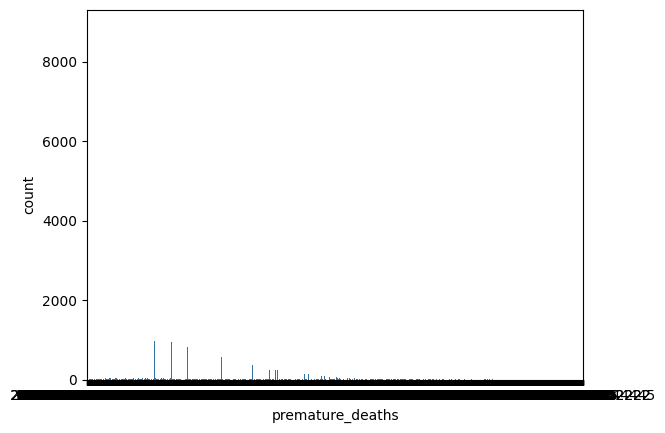

In [62]:
sns.countplot(x='premature_deaths', data=df)

In [63]:
# Fill NaN in premature deaths with median, sort by city and year

def fill_na_with_group_median(group):
    return group.fillna(group.median())

df['premature_deaths'] = df.groupby(['city', 'year'])['premature_deaths'].transform(fill_na_with_group_median)

df['premature_deaths']
df_median = df

<Axes: xlabel='premature_deaths', ylabel='count'>

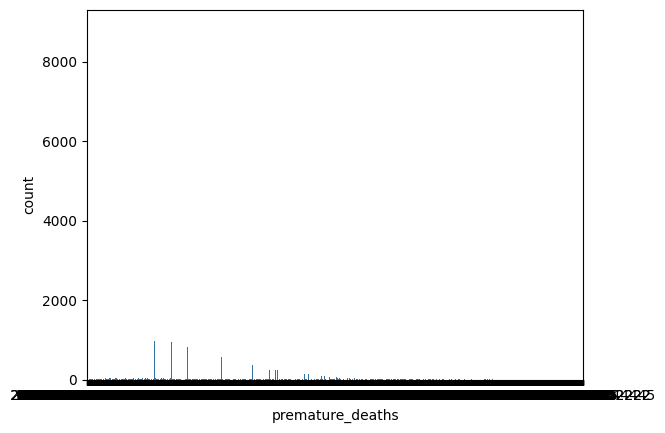

In [64]:
sns.countplot(x='premature_deaths', data=df_median)

In [ ]:
# 3. remove duplicated rows (if any)



In [3]:
df.shape

(226610, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226610 entries, 0 to 226609
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   City Boundary Specification (LAU/grid)             226610 non-null  object 
 1   Country Or Territory                               226610 non-null  object 
 2   City                                               226610 non-null  object 
 3   City Code                                          222270 non-null  object 
 4   Total City Population *                            226610 non-null  int64  
 5   Year                                               226610 non-null  int64  
 6   Air Pollutant                                      226610 non-null  object 
 7   Health Risk Scenario                               226610 non-null  object 
 8   Populated Area [km2]                               226610 non-null  int64 

In [5]:
df.nunique()

City Boundary Specification (LAU/grid)                   2
Country Or Territory                                    28
City                                                   908
City Code                                             1434
Total City Population *                              23366
Year                                                    17
Air Pollutant                                            4
Health Risk Scenario                                     3
Populated Area [km2]                                   377
Air Pollution Average [ug/m3]                        25539
Air Pollution Population Weighted Average [ug/m3]    25291
Premature Deaths                                      3926
Premature Deaths - lower CI                           3247
Premature Deaths - upper CI                           4535
Years Of Life Lost                                   12516
Years Of Life Lost - lower CI                        10475
Years Of Life Lost - upper CI                        142

In [11]:
# Null values check
df.isna().any()
df.isna().sum()

# findings: suggesting to drop city code (-1.92%)
# potentially dropping premature deaths (-21.94%)

City Boundary Specification (LAU/grid)                   0
Country Or Territory                                     0
City                                                     0
City Code                                             4340
Total City Population *                                  0
Year                                                     0
Air Pollutant                                            0
Health Risk Scenario                                     0
Populated Area [km2]                                     0
Air Pollution Average [ug/m3]                            0
Air Pollution Population Weighted Average [ug/m3]        0
Premature Deaths                                     49708
Premature Deaths - lower CI                          49708
Premature Deaths - upper CI                          49708
Years Of Life Lost                                   49708
Years Of Life Lost - lower CI                        49708
Years Of Life Lost - upper CI                        497

In [14]:
df['Total City Population *'].max()

np.int64(149969425)

In [15]:
columns_to_check = [
    "Premature Deaths",
    "Premature Deaths - lower CI",
    "Premature Deaths - upper CI",
    "Years Of Life Lost",
    "Years Of Life Lost - lower CI",
    "Years Of Life Lost - upper CI"
]

rows_with_null_values = df[columns_to_check].isnull().all(axis=1)

years_countries = df.loc[rows_with_null_values, ['Country Or Territory', 'Year']]


print(years_countries)

rows_with_null_values = df[columns_to_check].isnull().all(axis=1)

years_countries = df.loc[rows_with_null_values, ['Country Or Territory', 'Year']]


print(years_countries)

       Country Or Territory  Year
56                  Austria  2005
57                  Belgium  2005
58                 Bulgaria  2005
59                   Cyprus  2005
60                  Czechia  2005
...                     ...   ...
226583             Slovakia  2019
226590             Slovakia  2020
226594             Slovakia  2020
226601             Slovakia  2021
226605             Slovakia  2021

[49708 rows x 2 columns]
       Country Or Territory  Year
56                  Austria  2005
57                  Belgium  2005
58                 Bulgaria  2005
59                   Cyprus  2005
60                  Czechia  2005
...                     ...   ...
226583             Slovakia  2019
226590             Slovakia  2020
226594             Slovakia  2020
226601             Slovakia  2021
226605             Slovakia  2021

[49708 rows x 2 columns]


In [19]:
years_countries.unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [20]:
years_countries

,Country Or Territory,Year
56,Austria,2005
57,Belgium,2005
58,Bulgaria,2005
59,Cyprus,2005
60,Czechia,2005
...,...,...
226583,Slovakia,2019
226590,Slovakia,2020
226594,Slovakia,2020
226601,Slovakia,2021
